In [1]:
import torch
import torch.nn.functional as F 
from torch_geometric.datasets import WikiCS
import math

dataset = WikiCS('.')

In [2]:
numselfs = 0
for a, b in zip(dataset[0].edge_index[0], dataset[0].edge_index[1]):
    if a != b:
        numselfs += 1
numselfs

296509

In [23]:
num = 0
data = dataset[0]
mat = torch.zeros(data.num_nodes, data.num_nodes)
for a, b in zip(dataset[0].edge_index[0], dataset[0].edge_index[1]):
    if a != b and mat[a, b]==0 and mat[b, a]==0:
        mat[a, b] = 1
        mat[b, a] = 1
        num += 1
num

215603

In [26]:
num5 = 0
for i in range(mat.shape[0]):
    for j in range(i, mat.shape[0]):
        if mat[i, j] and mat[j, i]:
            num5 += 1
    print(i/mat.shape[0], end='\r')

num5

0.9999145372190411

215603

In [ ]:
num6 = num7 = 0
num6 += 1
num6, num7

In [32]:
num6, num7, num8, num9 = 0, 0, 0, 0
sums_rows = mat.sum(dim=1)
sums_colums = mat.sum(dim=0)
#out
for s in sums_rows:
    suma = s.sum().item()
    if suma < 0.5: num7+= 1
    if suma > 9.5: num9+= 1

#in
for s in sums_colums:
    suma = s.sum().item()
    if suma < 0.5: num6+= 1
    if suma > 9.5: num8+= 1

out_degrees = sums_rows
in_degrees = sums_colums
num6, num7, num8, num9

(337, 337, 6509, 6509)

In [103]:
bins = list(range(0, 340, 1))
bins_log = [math.log(i) for i in range(1, 11701, 1)]
out_degrees_log = torch.log(out_degrees)
xs_log = [bins_log[i]+bins_log[i+1]/2 for i in range(len(bins_log)-1)]
h_log = np.log(np.array(h))

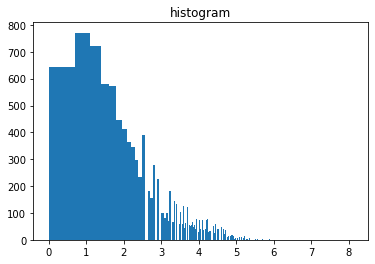

In [72]:
from matplotlib import pyplot as plt 
import numpy as np  
   
plt.hist(out_degrees_log.numpy(), bins_log) 
plt.title("histogram") 
plt.show()

In [54]:
torch.max(out_degrees)

tensor(3323.)

In [101]:
np.polyfit(xs_log, h_log, 1)

array([-1.32711959, -5.79954998])

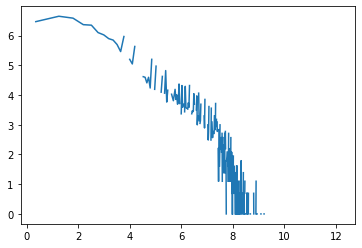

In [104]:
h, b = np.histogram(out_degrees_log.numpy(), bins=bins_log)
h.shape, out_degrees_log.shape, len(bins_log), len(xs)
plt.plot(xs_log, h_log)